<a href="https://colab.research.google.com/github/Pawantripathi2606/DUPLICATE_QUESTION_PAIRS/blob/main/dublicate_question_pairs_basic_bow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IT INCLUDES
##1- INITAL EDA
##2- ONLY BOW ACCURACY CHECK
##3 - BOW WITH BASIC FEATURE ENGG
##4 - BOW WITH ADVANCE FEATURE ENGG (nxt notebook)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv(r'/content/drive/MyDrive/gooogle colab datasets/train.csv/train.csv')

In [ ]:
df.shape

(404290, 6)

In [ ]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


simply we have to justify the binary classisfication to that in 0-1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [ ]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
220799,220799,8284,327970,Where can I find a commercial cleaning service...,Where can I get best general cleaning services...,1
66965,66965,115973,115974,What is the difference between fact and opinion?,What is difference between fact and opinion/view?,1
327626,327626,454070,454071,Can I install a 64 bit Windows 8.1 on my Intel...,I have an old computer in my house (Intel Pent...,0
216508,216508,240171,105486,What do girls like in a man?,What do girls like in cute boys?,0
101931,101931,168751,168752,How can I control some website variables using...,Why does lead and zinc found together?,0
171097,171097,66112,54189,What are some things new employees should know...,What are some things new employees should know...,0
32455,32455,45373,59756,Turning an Arduino prototype into production -...,How should I start to build a video that showc...,0
112116,112116,183495,183496,Is Russia good place to start a business?,What is it like to start a business in Russia?,0
403225,403225,35528,161305,"If the Sun disappeared, would the Earth contin...",Will earth continue to revolve around sun for ...,1
156753,156753,193183,245247,What are the topics that are asked in IRA1 and...,What is IRA1 and IRA2 tests at the time of joi...,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [ ]:
df.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,1
question2,2
is_duplicate,0


In [ ]:
df.duplicated().sum()

np.int64(0)

is_duplicate
0    255027
1    149263
Name: count, dtype: int64
is_duplicate
0    63.080215
1    36.919785
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

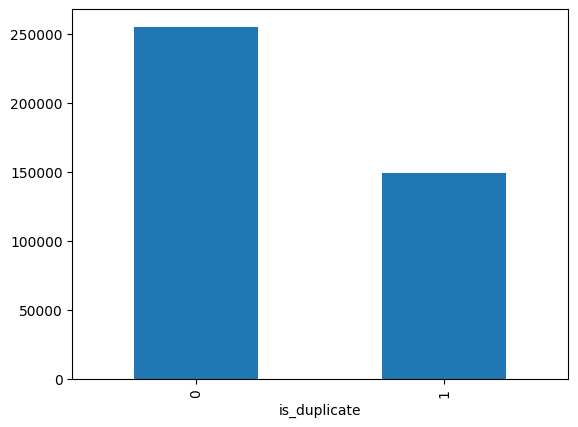

In [ ]:
# here we can see that the distrubution of dublicate and non - dublicate questions here , 0 for for non dublicates and 1 for dublicates
print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [ ]:
# repeated questions

qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print("numbers of unique questions",np.unique(qid).shape[0])
x=qid.value_counts()>1
print("number of total questions getting repeated",x[x].shape[0])


numbers of unique questions 537933
number of total questions getting repeated 111780


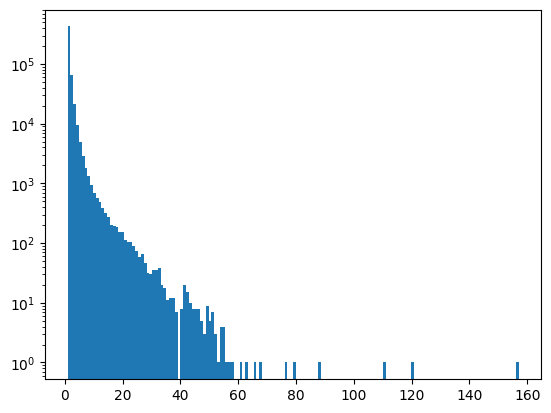

In [ ]:
# repeated questions histogram

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

**the simple seniario we can create that we justify through this approch that we are having qid1,qid2,question1,question2,isdublicate is there  so we apply  BOW IN BOTH QUESTION 1,2 AND ANY tipicaly random forest algorithm to just find accuracy**

In [ ]:
new_df = df.sample(30000)

In [ ]:
new_df.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,1
question2,0
is_duplicate,0


In [ ]:
new_df.duplicated().sum()

np.int64(0)

In [ ]:
# taking only question 1 , question 2 data frame

ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
217947,I'm 29 years old and a female. Do dating apps ...,I'm a 22 year old female and I just moved to D...
382183,What does dynamic company do?,What is dynamic?
316704,How do I use condom?,How does one use a condom?
69892,Was Steve Jobs at all technical? Did he know h...,"Was Steve Jobs just an ""idea guy""?"
33924,What is the craziest thing to do in college?,What is the craziest thing you have done in co...


In [ ]:
# merge the both pairs of questions and convert them into list

from sklearn.feature_extraction.text import CountVectorizer
#merge text
questions = list(ques_df['question1'].fillna('')) + list(ques_df['question2'].fillna(''))
cv= CountVectorizer(max_features=3000)

# since a lot questions are there we just split it mark to the 30k for question1 and 30 k for question 2
q1_arr,q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [ ]:
# convert them into data frame and concatiante them

temp_df1 = pd.DataFrame(q1_arr,index=ques_df.index)
temp_df2 = pd.DataFrame(q2_arr,index=ques_df.index)
#concatinate
temp_df = pd.concat([temp_df1,temp_df2],axis=1)
temp_df.shape  # we get 30k rows and 6k columns 3k for ques1 and 3k for ques2

(30000, 6000)

In [ ]:
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
217947,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
382183,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
316704,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69892,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33924,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118221,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
305116,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
377648,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
206182,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
temp_df['is_dublicate']=new_df['is_duplicate']
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_dublicate
217947,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
382183,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
316704,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
69892,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
33924,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
# train / test / split

#from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test = train_test_split(temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,test_size=0.2,random_state=1)


In [ ]:
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import accuracy_score
#rf = RandomForestClassifier()
#rf.fit(X_train,y_train)
#y_pred = rf.predict(X_test)
#accuracy_score(y_test,y_pred)

In [ ]:
new_df=df.sample(30000,random_state=2)

In [ ]:
new_df.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,0
question2,0
is_duplicate,0


In [ ]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0


is_duplicate
0    19013
1    10987
Name: count, dtype: int64
is_duplicate
0    63.376667
1    36.623333
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

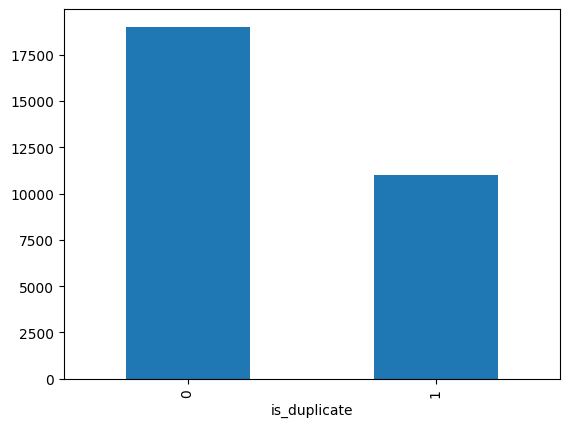

In [ ]:
# distribution of dublicate and non duplicate question

print(new_df['is_duplicate'].value_counts())
print((new_df['is_duplicate'].value_counts()/new_df['is_duplicate'].count())*100)
new_df['is_duplicate'].value_counts().plot(kind='bar')

In [ ]:
# repeated questions
qid = pd.Series(new_df['qid1'].tolist() + new_df['qid2'].tolist())
print("numbers of unique questions",np.unique(qid).shape[0])
x=qid.value_counts()>1
print("number of total questions getting repeated",x[x].shape[0])


numbers of unique questions 55299
number of total questions getting repeated 3480


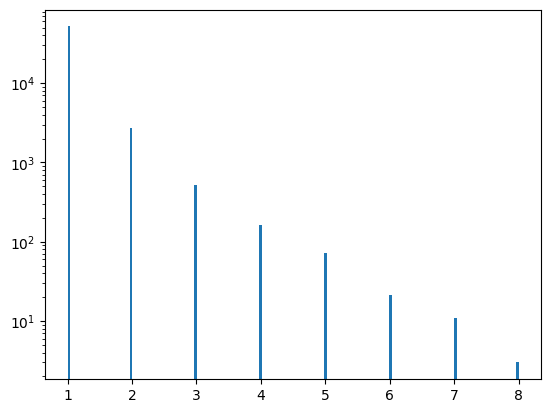

In [ ]:
# histogram of repeated questions

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [ ]:
# adding features for better performennce  // adding impact full features

# determining the length of the question both question 1 and 2


new_df['q1_len'] = new_df['question1'].str.len()
new_df['q2_len'] = new_df['question2'].str.len()

In [ ]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50


In [ ]:
# also add new columns and check the number of words

new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))

In [ ]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9


In [ ]:
# identify common words
# list - set

def common_words(row):
  w1 = set(map(lambda word: word.lower().strip(),row['question1'].split(" ")))
  w2 = set(map(lambda word: word.lower().strip(),row['question2'].split(" ")))
  return len(w1 & w2)



In [ ]:
new_df['word_common'] = new_df.apply(common_words,axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3


In [ ]:
def total_words(row):
  w1 = set(map(lambda word: word.lower().strip(),row['question1'].split(" ")))
  w2 = set(map(lambda word: word.lower().strip(),row['question2'].split(" ")))
  return (len(w1) + len(w2))

In [ ]:
new_df['word_total']=new_df.apply(total_words,axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11,24
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7,23
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2,34
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0,32
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3,13


In [ ]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11,24,0.46
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7,23,0.30
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2,34,0.06
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0,32,0.00
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3,13,0.23


/tmp/ipython-input-2748632665.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['q1_len'],color='red')


minimum charachter 2
maximum charachter 391
average charachter 59


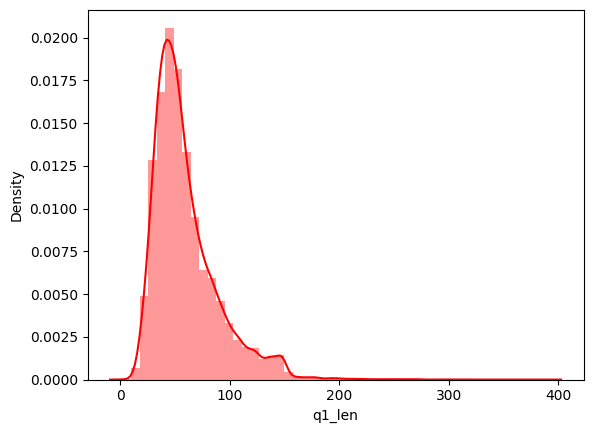

In [ ]:
# analysis of features


sns.distplot(new_df['q1_len'],color='red')
print('minimum charachter' , new_df['q1_len'].min())
print('maximum charachter' , new_df['q1_len'].max())
print('average charachter' , int(new_df['q1_len'].mean()))

/tmp/ipython-input-433694910.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['q2_len'])


minimum charachter 6
maximum charachter 1151
average charachter 60


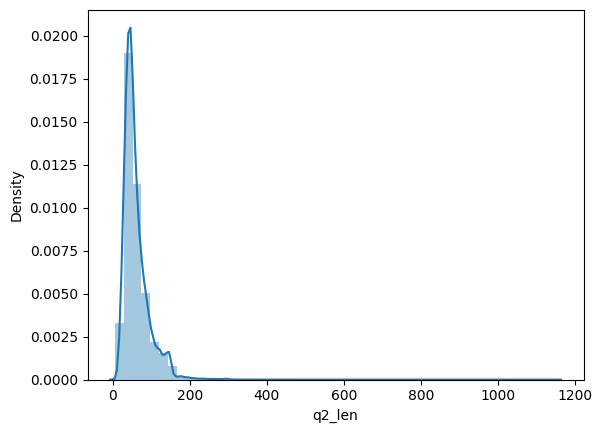

In [ ]:
sns.distplot(new_df['q2_len'])
print('minimum charachter' , new_df['q2_len'].min())
print('maximum charachter' , new_df['q2_len'].max())
print('average charachter' , int(new_df['q2_len'].mean()))

minimum words 1
maximum words 72
average words 10


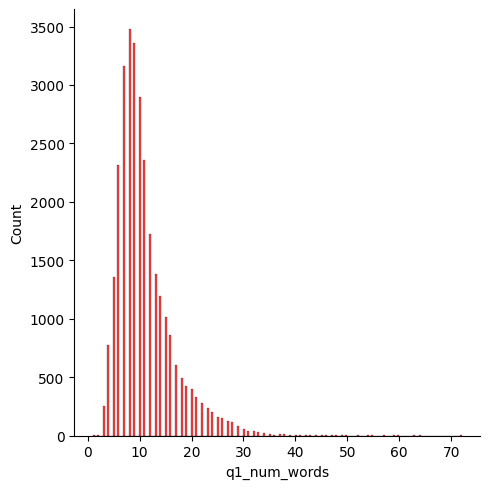

In [ ]:
sns.displot(new_df['q1_num_words'],color='red')
print('minimum words' , new_df['q1_num_words'].min())
print('maximum words' , new_df['q1_num_words'].max())
print('average words' , int(new_df['q1_num_words'].mean()))

minimum words 1
maximum words 237
average words 11


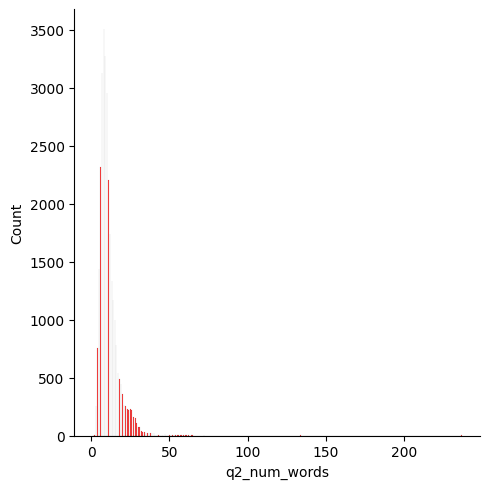

In [ ]:
sns.displot(new_df['q2_num_words'],color='red')
print('minimum words' , new_df['q2_num_words'].min())
print('maximum words' , new_df['q2_num_words'].max())
print('average words' , int(new_df['q2_num_words'].mean()))

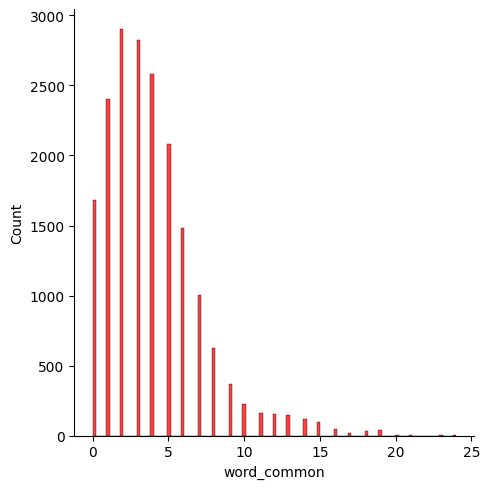

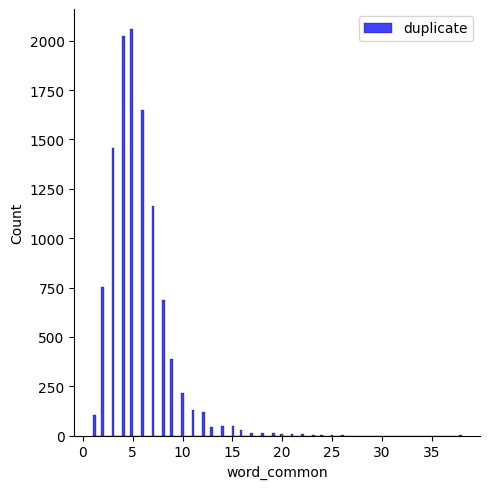

In [ ]:
# common words

sns.displot(new_df[new_df['is_duplicate']==0]['word_common'],label='non duplicate',color='red')
sns.displot(new_df[new_df['is_duplicate']==1]['word_common'],label='duplicate',color='blue')
plt.legend()
plt.show()

/tmp/ipython-input-319387005.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate']==0]['word_common'],label='non duplicate',color='red')
/tmp/ipython-input-319387005.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate']==1]['word_common'],l

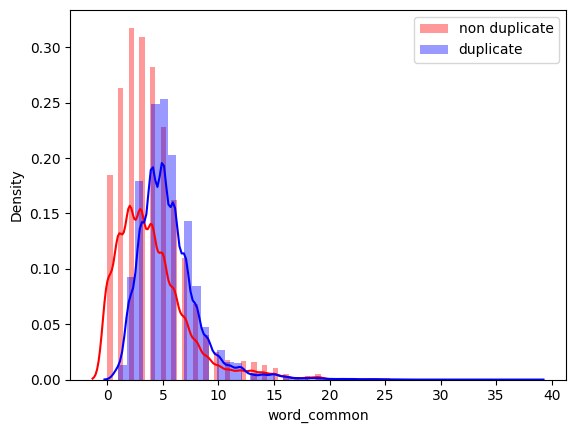

In [ ]:
# common words merging

sns.distplot(new_df[new_df['is_duplicate']==0]['word_common'],label='non duplicate',color='red')
sns.distplot(new_df[new_df['is_duplicate']==1]['word_common'],label='duplicate',color='blue')
plt.legend()
plt.show()

/tmp/ipython-input-4128995937.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate']==0]['word_total'],label='non duplicate',color='red')
/tmp/ipython-input-4128995937.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate']==1]['word_total'],l

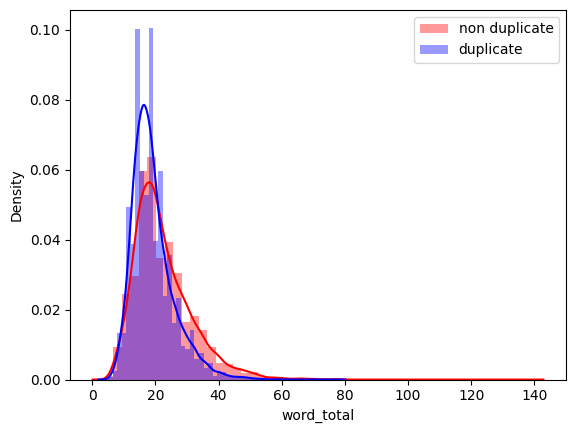

In [ ]:
# total words
sns.distplot(new_df[new_df['is_duplicate']==0]['word_total'],label='non duplicate',color='red')
sns.distplot(new_df[new_df['is_duplicate']==1]['word_total'],label='duplicate',color='blue')
plt.legend()
plt.show()

/tmp/ipython-input-2773464374.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate']==0]['word_share'],label='non duplicate',color='red')
/tmp/ipython-input-2773464374.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate']==1]['word_share'],l

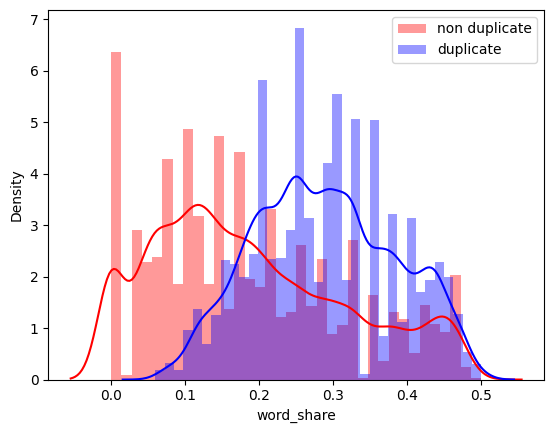

In [ ]:
# word share

sns.distplot(new_df[new_df['is_duplicate']==0]['word_share'],label='non duplicate',color='red')
sns.distplot(new_df[new_df['is_duplicate']==1]['word_share'],label='duplicate',color='blue')
plt.legend()
plt.show()

In [ ]:
# same again making diff columns apart

ques_df=new_df[['question1','question2']]
ques_df.head()

,question1,question2
398782,What is the best marketing automation tool for...,What is the best marketing automation tool for...
115086,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...
327711,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...
367788,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...
151235,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...


In [ ]:
# making final data frame removing unless not required columns from origanl table

final_df=new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
398782,1,76,77,12,12,11,24,0.46
115086,0,49,57,12,15,7,23,0.30
327711,0,105,120,25,17,2,34,0.06
367788,0,59,146,12,30,0,32,0.00
151235,0,35,50,5,9,3,13,0.23


In [ ]:
# applying bag of words in question df

from sklearn.feature_extraction.text import CountVectorizer

# merge

question = list(ques_df['question1']) + list(ques_df['question2'])
cv = CountVectorizer(max_features=3000)
q1_arr,q2_arr = np.vsplit(cv.fit_transform(question).toarray(),2)

In [ ]:
temp_df1=pd.DataFrame(q1_arr,index=ques_df.index)
temp_df2=pd.DataFrame(q2_arr,index=ques_df.index)
temp_df=pd.concat([temp_df1,temp_df2],axis=1)
temp_df.shape  # 30k rows and along we have 3k columns for ques1 and for 3k for ques2

(30000, 6000)

In [ ]:
final_df=pd.concat([final_df,temp_df],axis=1)
print(final_df.shape)
final_df.head()

(30000, 6008)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
398782,1,76,77,12,12,11,24,0.46,0,0,...,0,0,0,0,0,0,0,0,0,0
115086,0,49,57,12,15,7,23,0.30,0,0,...,0,0,0,0,0,0,0,0,0,0
327711,0,105,120,25,17,2,34,0.06,0,0,...,0,0,0,0,0,0,0,0,0,0
367788,0,59,146,12,30,0,32,0.00,0,0,...,0,0,0,1,0,0,0,0,0,0
151235,0,35,50,5,9,3,13,0.23,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# train / test / split
#from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [ ]:


#from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import accuracy_score
#rf = RandomForestClassifier()
#X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)
#rf.fit(X_train,y_train)
#y_pred = rf.predict(X_test)
#accuracy_score(y_test,y_pred)    #0.7691666666666667 o/p

0.7691666666666667

**so we need to improve more accuracy we add more advance features more text preprossesing -- some toekn features -- length based features -- fuzzy features**

**cwc_min = ratio of common words to the len of the smaller question

cwc_max = ratio of no of coomon words to the len of the larger question

csc_min = ratio of no of common stop words to the smaller stop word count among the two question


as of more like csc_max , ctc_min , ctc_max , last_word_eq , first_word_eq**

#Advanced Features
#2. Length Based Features
##- abs_len_diff: Absolute difference between the length of the two questions (number of words)
##- mean_len: Mean of the length of the two questions (number of words)
##- longest_substr_ratio: Ratio of the length of the longest substring among the two questions to the length of the smaller question
#3. Fuzzy Features
##- fuzz_ratio: fuzz_ratio score from fuzzywuzzy
##-fuzz_partial_ratio:
##-fuzz_partial_ratio from fuzzywuzzy
##-token_sort_ratio: token_sort_ratio from fuzzywuzzy
##-token_set_ratio: token_set_ratio from fuzzywuzzy

# next iteration on advance features on advance feature note book